In [55]:
import pandas as pd

# 데이터 불러오기
df = pd.read_csv('exchange_rate_data.csv', encoding='utf-16', sep='\t')

# 데이터 기본 정보 확인
print(df.info())
print(df.describe())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14268 entries, 0 to 14267
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   통화코드      14268 non-null  object 
 1   적용시작일     14268 non-null  object 
 2   매매기준율     14268 non-null  float64
 3   미달러환산율    14268 non-null  float64
 4   주화매입률     14268 non-null  float64
 5   주화매도율     14268 non-null  float64
 6   현찰매입률     14268 non-null  float64
 7   현찰매도율     14268 non-null  float64
 8   수표매입률     14268 non-null  float64
 9   수표매도율     14268 non-null  float64
 10  전신환매입률    14268 non-null  float64
 11  전신환매도율    14268 non-null  float64
 12  여행자수표매입률  14268 non-null  float64
 13  여행자수표매도율  14268 non-null  float64
dtypes: float64(12), object(2)
memory usage: 1.5+ MB
None
              매매기준율        미달러환산율         주화매입률         주화매도율         현찰매입률  \
count  14268.000000  14268.000000  14268.000000  14268.000000  14268.000000   
mean     518.539715      0.397203    313.327003    

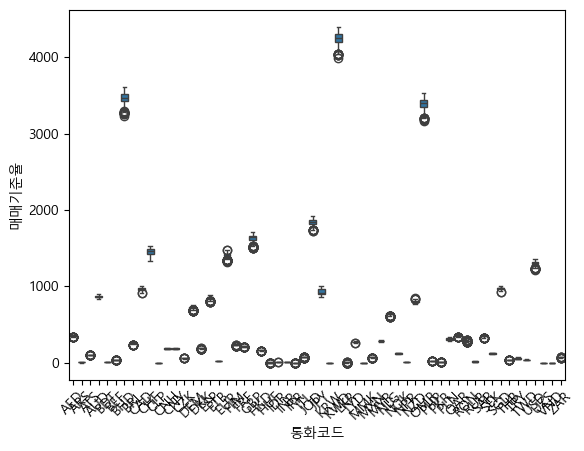

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# 'Malgun Gothic' 폰트 사용
plt.rcParams['font.family'] = 'Malgun Gothic'
# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# '매매기준율'에 대한 box plot
sns.boxplot(x='통화코드', y='매매기준율', data=df)
plt.xticks(rotation=45)
plt.show()

In [59]:
for code in df['통화코드'].unique():
    subset = df[df['통화코드'] == code]
    print(code, subset['매매기준율'].describe())

# 해당 통화가 실제로 가질 수 없는 값이 섞여 있거나,
# 특정 통화가 유독 1~2개 값만 이상하게 튀는 경우는 보이지 않음. 따라서 이상치 처리는 진행하지 않는다.

AED count    246.000000
mean     355.455528
std        8.243637
min      331.600000
25%      351.770000
50%      356.115000
75%      361.007500
max      370.540000
Name: 매매기준율, dtype: float64
ARS count    246.000000
mean       5.008089
std        1.373006
min        1.600000
25%        3.822500
50%        5.105000
75%        6.247500
max        7.180000
Name: 매매기준율, dtype: float64
ATS count    246.000000
mean     102.667886
std        2.397378
min       96.760000
25%      101.642500
50%      103.185000
75%      104.017500
max      107.460000
Name: 매매기준율, dtype: float64
AUD count    246.000000
mean     867.338780
std       13.203623
min      838.350000
25%      858.307500
50%      865.535000
75%      876.740000
max      899.160000
Name: 매매기준율, dtype: float64
BDT count    246.000000
mean      12.084553
std        0.267592
min       11.420000
25%       11.860000
50%       12.110000
75%       12.280000
max       12.660000
Name: 매매기준율, dtype: float64
BEF count    246.000000
mean      35.020

In [61]:
# One-Hot Encoding
df = pd.get_dummies(df, columns=['통화코드'])

# “어떤 통화 지역에서 오는 관광객이 많을 때 혼잡도가 올라가는가?” 

In [63]:
# 날짜 형식 변환
df['적용시작일'] = pd.to_datetime(df['적용시작일'])

# 연도, 월, 일, 요일 파생 변수 추가
df['연도'] = df['적용시작일'].dt.year
df['월'] = df['적용시작일'].dt.month
df['일'] = df['적용시작일'].dt.day
df['요일'] = df['적용시작일'].dt.dayofweek  # 월=0, 일=6

In [65]:
# 드롭할 열 목록 지정
drop_cols = ['적용시작일','주화매입률', '주화매도율', '수표매입률', '수표매도율', '여행자수표매입률', '여행자수표매도율']

# 드롭 실행 (inplace=True로 원본 df에서 제거)
df.drop(columns=drop_cols, inplace=True)

In [67]:
from sklearn.preprocessing import StandardScaler

# 스케일링할 열 목록 지정
scale_cols = ['매매기준율', '미달러환산율', '현찰매입률', '현찰매도율', '전신환매입률', '전신환매도율']

# StandardScaler 객체 생성
scaler = StandardScaler()

# 스케일링 수행 후, 해당 열들을 바로 df에 덮어쓰기
df[scale_cols] = scaler.fit_transform(df[scale_cols])

# 결과 확인
print(df.head())

      매매기준율    미달러환산율     현찰매입률     현찰매도율    전신환매입률    전신환매도율  통화코드_AED  \
0 -0.196166 -0.185806 -0.195716 -0.174508 -0.196079 -0.196252      True   
1 -0.582553 -0.582401 -0.574472 -0.564135 -0.582583 -0.582524     False   
2 -0.479133 -0.475294 -0.469242 -0.463429 -0.479128 -0.479139     False   
3  0.397289  0.423367  0.416999  0.395124  0.397532  0.397050     False   
4 -0.576790 -0.576451 -0.568638 -0.558493 -0.576823 -0.576757     False   

   통화코드_ARS  통화코드_ATS  통화코드_AUD  통화코드_BDT  통화코드_BEF  통화코드_BHD  통화코드_BRL  \
0     False     False     False     False     False     False     False   
1      True     False     False     False     False     False     False   
2     False      True     False     False     False     False     False   
3     False     False      True     False     False     False     False   
4     False     False     False      True     False     False     False   

   통화코드_CAD  통화코드_CHF  통화코드_CLP  통화코드_CNH  통화코드_CNY  통화코드_CZK  통화코드_DEM  \
0     False     False  

In [69]:
# 컬럼 순서 재배치
cols_order = [
    '통화코드_AED', '통화코드_ARS', '통화코드_ATS', '통화코드_AUD',
    '통화코드_BDT', '통화코드_BEF', '통화코드_BHD', '통화코드_BRL', 
    '통화코드_CAD', '통화코드_CHF', '통화코드_CLP', '통화코드_CNH', 
    '통화코드_CNY', '통화코드_CZK', '통화코드_DEM', '통화코드_DKK',
    '통화코드_ESP', '통화코드_ETB', '통화코드_EUR', '통화코드_FIM', 
    '통화코드_FRF', '통화코드_GBP', '통화코드_HKD', '통화코드_HUF', 
    '통화코드_IDR', '통화코드_INR', '통화코드_IRR', '통화코드_ITL',
    '통화코드_JOD', '통화코드_JPY', '통화코드_KRW', '통화코드_KWD', 
    '통화코드_LKR', '통화코드_LYD', '통화코드_MMK', '통화코드_MXN', 
    '통화코드_MYR', '통화코드_NLG', '통화코드_NOK', '통화코드_NPR',
    '통화코드_NZD', '통화코드_OMR', '통화코드_PHP', '통화코드_PKR', 
    '통화코드_PLN', '통화코드_QAR', '통화코드_RON', '통화코드_RUB', 
    '통화코드_SAR', '통화코드_SEK', '통화코드_SGD', '통화코드_THB',
    '통화코드_TRY', '통화코드_TWD', '통화코드_USD', '통화코드_UZS', 
    '통화코드_VND', '통화코드_ZAR', 
    '연도', '월', '일',
    '매매기준율', '미달러환산율', '현찰매입률', '현찰매도율', 
    '전신환매입률', '전신환매도율'
]

# 컬럼 순서 변경 적용
df = df[cols_order]

# 결과 확인
print(df.head())

   통화코드_AED  통화코드_ARS  통화코드_ATS  통화코드_AUD  통화코드_BDT  통화코드_BEF  통화코드_BHD  \
0      True     False     False     False     False     False     False   
1     False      True     False     False     False     False     False   
2     False     False      True     False     False     False     False   
3     False     False     False      True     False     False     False   
4     False     False     False     False      True     False     False   

   통화코드_BRL  통화코드_CAD  통화코드_CHF  통화코드_CLP  통화코드_CNH  통화코드_CNY  통화코드_CZK  \
0     False     False     False     False     False     False     False   
1     False     False     False     False     False     False     False   
2     False     False     False     False     False     False     False   
3     False     False     False     False     False     False     False   
4     False     False     False     False     False     False     False   

   통화코드_DEM  통화코드_DKK  통화코드_ESP  통화코드_ETB  통화코드_EUR  통화코드_FIM  통화코드_FRF  \
0     False     False  

In [75]:
# 전처리 완료된 데이터 저장
df.to_csv('processed_exchange_rate_data.csv', index=False , encoding='utf-8-sig')